In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.constants import h 
from scipy.optimize import curve_fit

# Graficas Tauc y obtención de los band gap 
## Por: Gustavo A. Castrillón.

En el presente trabajo se realiza los cálculos de los band gap para 4 diferentes materiales, a partir de las graficas Tauc generadas por medio de los espectros medidos de reflectancia difusa. 

Para esto lo primero que se hace es medir la intensidad del espectro por medio de una esfera integradora (de referencia ISS-REF), esta esfera tiene una lampara halógena integrada, esto se hace, ya que, la intensidad medida por medio de la esfera integradora nos dará la información acerca de la reflectancia difusa dentro del material; es importante recalcar que la reflectancia medida aquí es una reflectancia difusa relativa entorno a un material. El proceso se realiza para: dióxido de titanio, polvo de dióxido de titanio, perovskita y oxido de zinc.

Por un análisis dentro de los parámetros de nuestro sistema, se puede notar incluso en las mismas graficas tomadas, que todo valor por debajo de 370 nm, es ruido y por tanto, se procede limitar el sistema entre los rangos de 370 nm y 900 nm

In [2]:
lim = 517 #Limite inferior
lim2 = 1

In [3]:
referencia_dark = r'KevinGustavo/TiO2.Master.dark'
referencia_luz = r'KevinGustavo/TiO2.Master.reference'
nombre_OTitanio = r'KevinGustavo/TiO2.Master.sample'
nombre_perovskita = r'KevinGustavo/Perovskita.Master.sample'
nombre_polvo_OTitanio = r'KevinGustavo/TiO2Polvo.Master.sample'
nombre_OZinc = r'KevinGustavo/ZnO.Master.sample'

#280 nm y 900 nm.

In [4]:
f = pd.read_csv(referencia_dark, sep='\t',skiprows=14, skipfooter=1,engine='python')
Ir = np.array(f)[lim:-lim2,1] #Aplico esto para filtrar la segunda fila de los datos. 
wld = np.array(f)[lim:-lim2,0]
f = pd.read_csv(referencia_luz, sep='\t',skiprows=14, skipfooter=1,engine='python')
Ireferencia = np.array(f)[lim:-lim2,1]
#Oxido de titanio
f = pd.read_csv(nombre_OTitanio, sep='\t',skiprows=14, skipfooter=1,engine='python')
IOTitanio = np.array(f)[lim:-lim2,1]
#Polvo de oxido de titanio
f = pd.read_csv(nombre_polvo_OTitanio, sep='\t',skiprows=14, skipfooter=1,engine='python')
IPOTitanio = np.array(f)[lim:-lim2,1]
#Perovskita
f = pd.read_csv(nombre_perovskita, sep='\t',skiprows=14, skipfooter=1,engine='python')
IPerovskita = np.array(f)[lim:-lim2,1]
f = pd.read_csv(nombre_OZinc, sep='\t',skiprows=14, skipfooter=1,engine='python')
IOZinc = np.array(f)[lim:-lim2,1]

In [5]:
ref = Ireferencia - Ir  
R1 = (IOTitanio - Ir) / ref #Dioxido de titanio
R2 = (IPOTitanio - Ir) / ref #Polvo de oxido de titanio
R3 = (IPerovskita - Ir) / ref #Perovskita
R4 = (IOZinc - Ir) / ref #Oxido de Zinc 

def graficador_reflectancia(wld,R,nombre="Reflectancia de un material"): 
    plt.figure(figsize=(10,10))
    plt.plot(wld,R,'b')
    plt.grid()
    plt.title(nombre)
    plt.xlim(330,900)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Reflectancia difusa ($R_{\infty}$)")
    #plt.legend()
    #plt.savefig(nombre+str(".jpg"))
    plt.show()
    
def transformacion_km (R): 
    return ((1-R)**2)/2*R

def graf(R,n):
    nu = 3e8/R
    return (transformacion_km(R)*h*nu)**(1/n)

# Espectros de la reflectancia difusa 

Como se menciono anteriormente se realiza una medición de la reflectancia difusa por medio de una esfera integradora, esta medición será una referencia y para ello, debemos obtener los espectros del material ($r_{material}$), de referencia ($r_{referencia}$) y el oscuro ($r_{oscuro}$) para aplicarlos a la siguiente ecuación: 

$$R{\infty} = \frac{r_{material} - r_{oscuro}}{r_{referencia} - r_{oscuro}}$$

siendo $R_{\infty}$ la reflectancia difusa relativa.

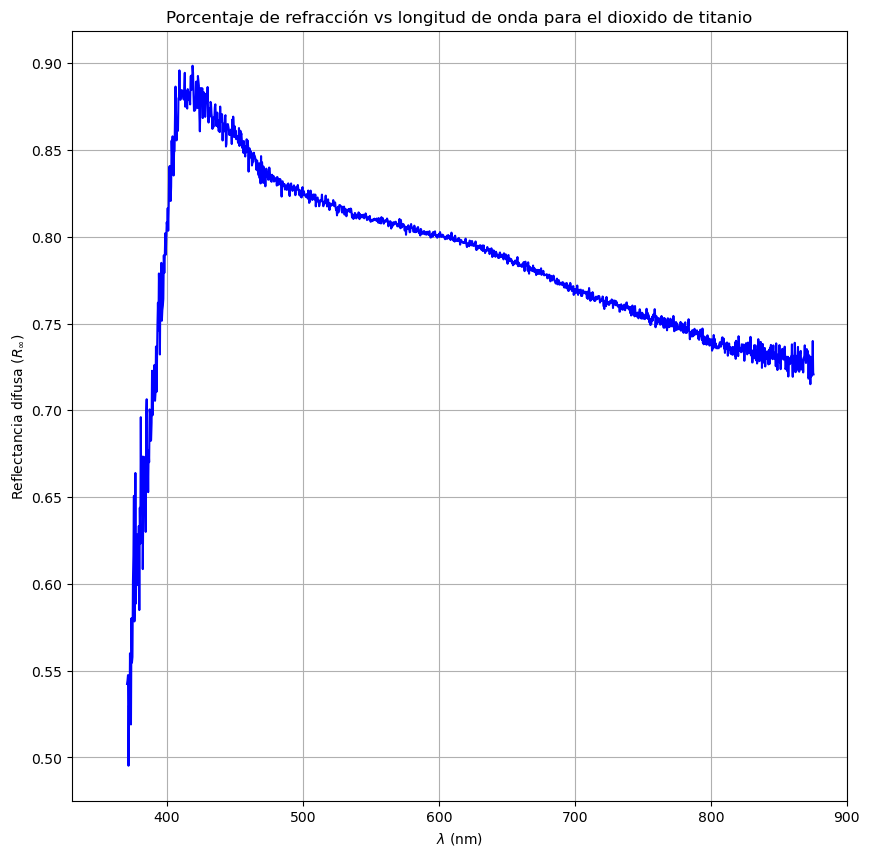

In [6]:
graficador_reflectancia(wld,R1,nombre='Porcentaje de refracción vs longitud de onda para el dioxido de titanio')

Es este grafico, se puede observar la reflectancia difusa para el dióxido de titanio, en esta podemos ver como su porcentaje mas alto se alcanza para un valor aproximado de 420 nm, lo que corresponde a colores azulados, si disminuimos la longitud de onda hacia el ultravioleta el dióxido de titanio no tendrá una reflección considerable para esta longitud de onda, mientras que, para el resto del espectro visible valores entre 400 y 900 nm, tendremos una reflección difusa mas marcada.

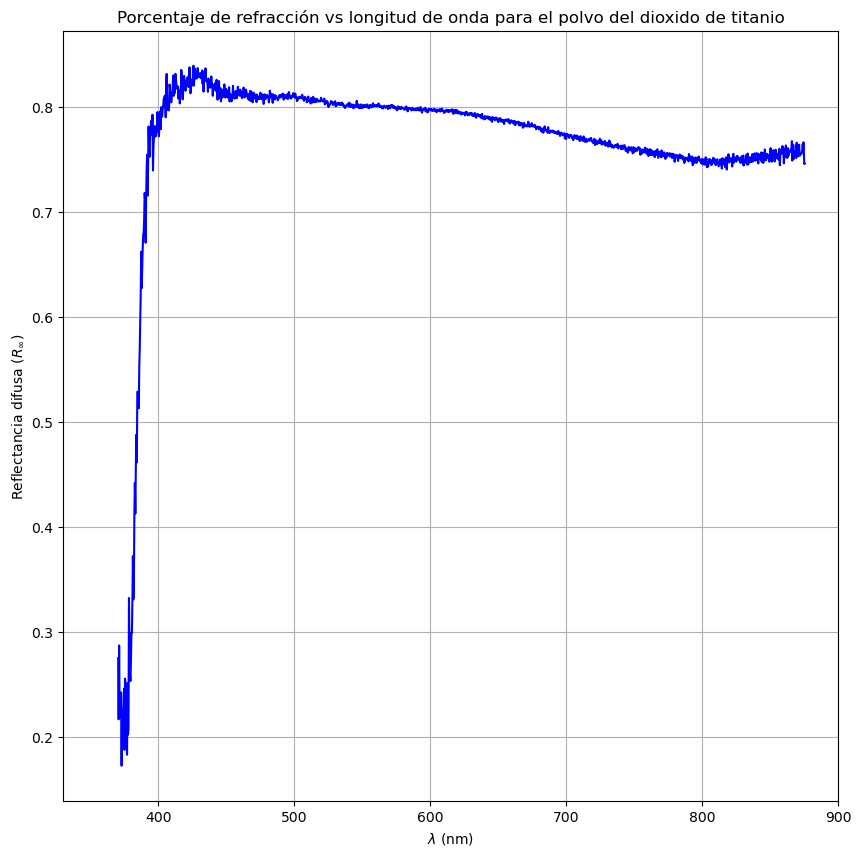

In [7]:
graficador_reflectancia(wld,R2,nombre='Porcentaje de refracción vs longitud de onda para el polvo del dioxido de titanio')

Similar a lo que sucede con el dióxido de titanio, el polvo de este también posee un comportamiento al menos para longitudes de onda bajas similares al material solido; este polvo, también tiene su pico alrededor de 420 nm pero, este no posee un porcentaje tan alto (como el solido) de casi 90 % sino de alrededor del 85%, mientras que para los valores de longitud de onda superior a 500 nm, se puede ver un incremento en el porcentaje de la reflectancia difusa en comparación a la gráfica anterior (para el material solido).

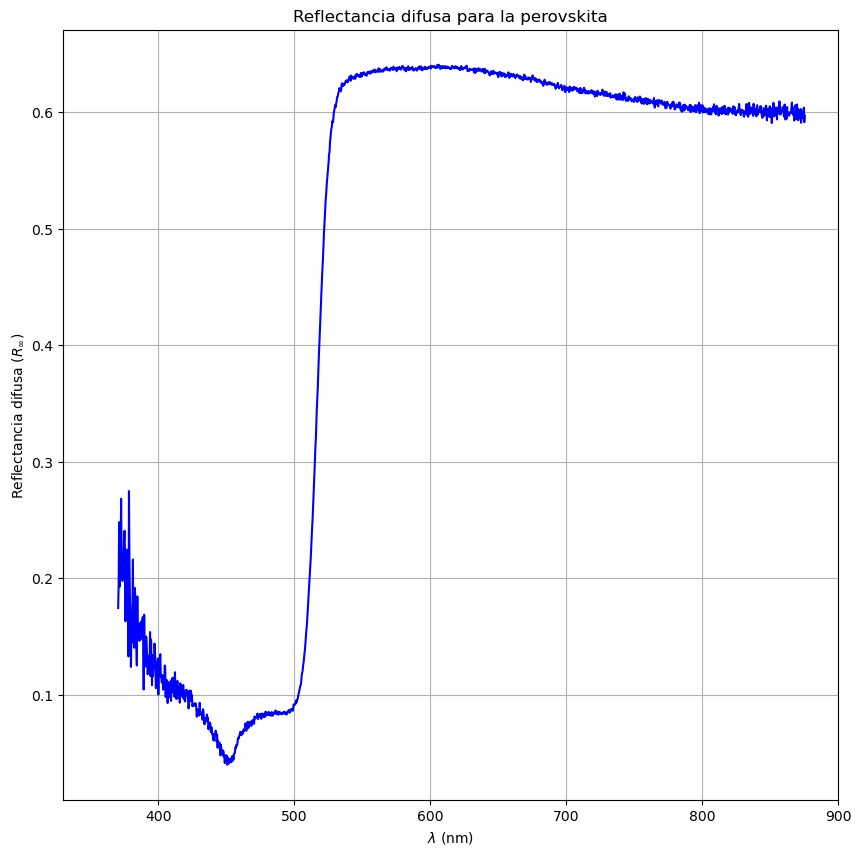

In [8]:
graficador_reflectancia(wld,R3,nombre='Reflectancia difusa para la perovskita')

El grafico para la perovskita presenta un comportamiento interesante a partir de los valores de 500 nm donde, se presenta un gran incremento y trata de mantener un porcentaje aproximadamente constante, aun asi el porcentaje solo alcanza valores alrededor del 60% 

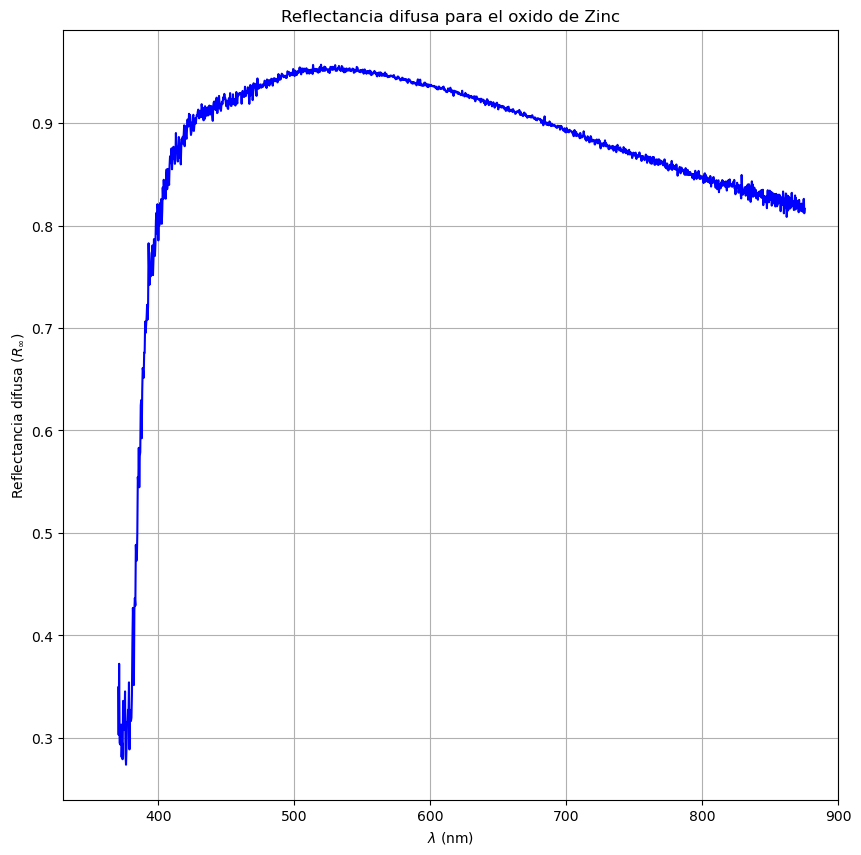

In [9]:
graficador_reflectancia(wld,R4,nombre='Reflectancia difusa para el oxido de Zinc')

In [10]:
def graficador(R,nombre="Absorción en función de la frencuencia"):
    f1 = graf(R,1/2)
    f2 = graf(R,2)
    x = h*3e8/R
    factor = 1e44/1.6e19
    plt.figure()
    plt.title(nombre)
    plt.ylabel("$(F(R ̣{\infty}) \hbar  v)^n $")
    plt.xlabel("$\hbar v $")
    plt.plot(x,f1,'r.',label='Función con n = 1/2')
    #plt.plot(x,f2,label='Función con n = 2')
    plt.legend()
    plt.show()

# Transformación de Kubelka-Munk
A través de la teoría podemos relacionar la reflección difusa con una relación entre la absorción (K) y el coeficiente de dispersión del material(S), por medio de la ecuación: 

$$F(R_\infty) = \frac{K}{S} = \frac{(1 - R^{\infty})^2 }{2R_{\infty}}$$

siendo $F(R_\infty)$ la función de Kubelka-Munk. Esta función tiene una relación con la energía de band gap, dada por la ecuación: 

$$(F(R_\infty)  hv)^{1/n} = B (hv - E_{g})$$

siendo $h$ la constante de Planck, $v$ la frecuencia, $E_{g}$ la energía del band gap. Esta ecuación es solo valida para regiones con un comportamiento lineal. Se puede ver que la ecuación anterior esta compuesta por un parámetro $n$, este parámetro determinar que tipo de transición se tienen en el band gap, por ejemplo para transiciones directas tenemos un valor de $n = 1/2$, mientras que para transiciones indirectas tenemos un valor de $n = 2$. Aquí se evaluaran ambas transiciones para determinar sus respectivos valores de transición de energía. 

A partir de los datos obtenidos por la primer ecuación, podemos calcular el band gap haciendo un ajuste a los gráficos en las zonas que presenten un comportamiento lineal.

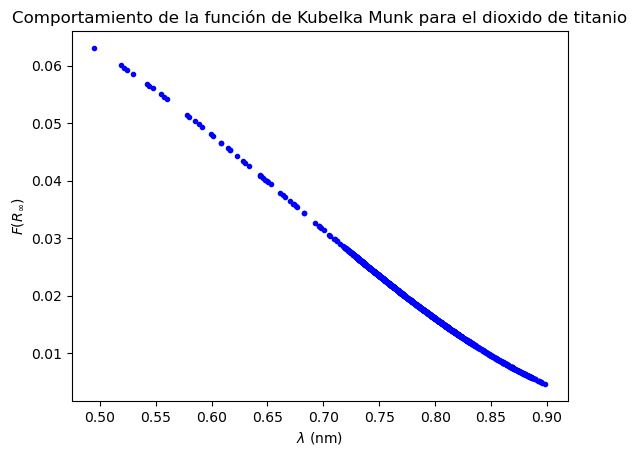

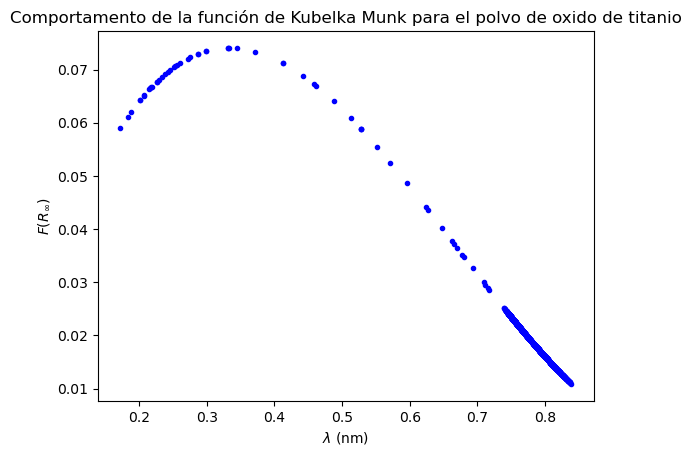

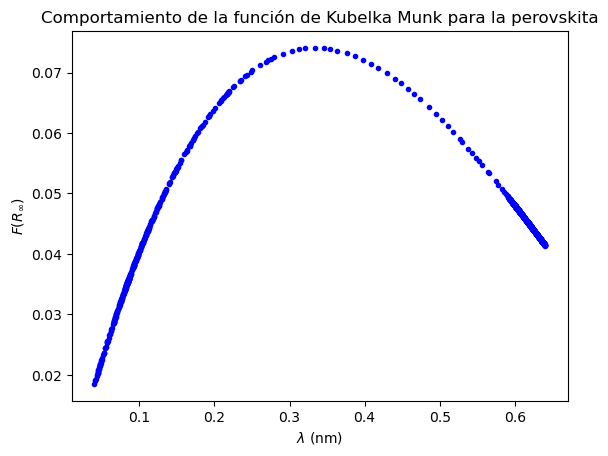

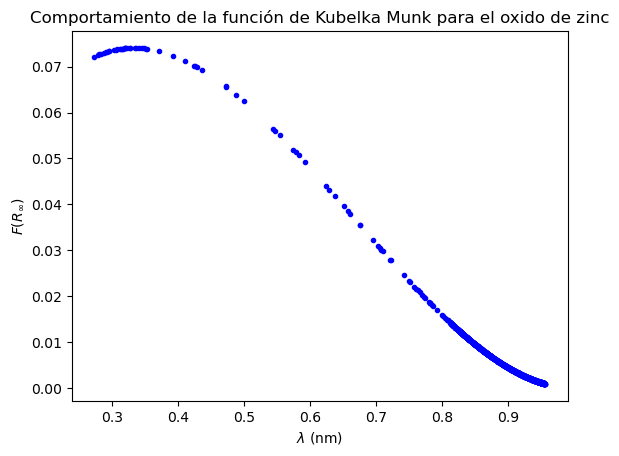

In [11]:
plt.figure()
plt.plot(R1,transformacion_km(R1),'b.')
plt.title("Comportamiento de la función de Kubelka Munk para el dioxido de titanio")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$F (R_{\infty}$)")
plt.show()
plt.figure()
plt.plot(R2,transformacion_km(R2),'b.')
plt.title("Comportamento de la función de Kubelka Munk para el polvo de oxido de titanio")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$F (R_{\infty}$)")
plt.show()
plt.figure()
plt.plot(R3,transformacion_km(R3),'b.')
plt.title("Comportamiento de la función de Kubelka Munk para la perovskita")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$F (R_{\infty}$)")
plt.show()
plt.plot(R4,transformacion_km(R4),'b.')
plt.title("Comportamiento de la función de Kubelka Munk para el oxido de zinc")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$F (R_{\infty}$)")
plt.show()

A continuación se gráfica $F(R_{\infty})hv$ en función de $hv$; se realiza un ajuste a los ordenes de magnitud para poder ver, de forma grafica ambos tipos de transiciones para el mismo material, por otro lado, se hace un ajuste a los ordenes de $hv$ para expresar la energía en términos de electrón voltios. Se realiza un ajuste lineal en los datos por las zonas con este comportamiento, y por medió de este ajuste podremos calcular las zonas de transición o band gaps para cada material. 

In [12]:
#Para el dioxido de titanio
f1_OTitanio = graf(R1,1/2)*1e52
f2_OTitanio = graf(R1,2)*1e13
x_OTitanio = (h*3e8/R1)*1e25
#Para el polvo del dioxido de titanio 
f1_POTitanio = graf(R2,1/2)*1e51
f2_POTitanio = graf(R2,2)*1e13
x_POTitanio = (h*3e8/R2)*1e25
#Para la parovskita 
f1_perovskita = graf(R3,1/2)*1e51
f2_perovskita = graf(R3,2)*1e13
x_perovskita = (h*3e8/R3)*1e25
#Para el oxido de zinc 
f1_ozinc = graf(R4,1/2)*1e51
f2_ozinc = graf(R4,2)*1e13
x_ozinc = (h*3e8/R4)*1e25
def linea(x,a,b): 
        return a*(x + b) 
    
def funcion_lineal(xh,f,liminf,limsup): 
    xl=[]
    fl1 =[]
    for i in range(len(xh)): 
        if((xh[i] <= limsup) and (xh[i] >=liminf)): 
            xl.append(xh[i])
            fl1.append(f[i])
    par, cov = curve_fit(linea,xl,fl1)
    return par,cov

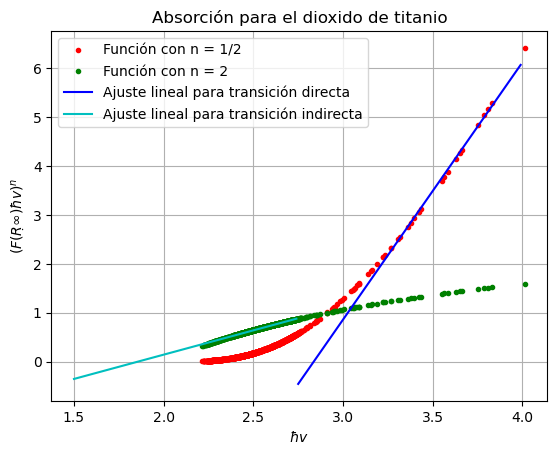

El band gap de transición directa para el dioxido de titanio es 
2.8366325984281966
El band gap de transición indirecta para el dioxido de titanio es 
1.8562445541073496


In [18]:
#graficador(R1,nombre="Absorción para el dioxido de titanio")
nombre = "Absorción para el dioxido de titanio"
par1,cov1 = funcion_lineal(x_OTitanio,f1_OTitanio,3.25,4)
par2,cov2 = funcion_lineal(x_OTitanio,f2_OTitanio,2.25,2.75)
x11= np.arange(2.75,4.0,0.01)
y11= linea(x11,par1[0],par1[1])
x12= np.arange(1.5,2.75,0.01)
y12= linea(x12,par2[0],par2[1])
plt.figure()
plt.title(nombre)
plt.ylabel("$(F(R ̣{\infty}) \hbar  v)^n $")
plt.xlabel("$\hbar v $")
plt.plot(x_OTitanio,f1_OTitanio,'r.',label='Función con n = 1/2')
plt.plot(x_OTitanio,f2_OTitanio,'g.',label='Función con n = 2')
plt.plot(x11,y11,'b',label="Ajuste lineal para transición directa")
plt.plot(x12,y12,'c',label="Ajuste lineal para transición indirecta")
plt.grid()
plt.legend()
plt.show()
print("El band gap de transición directa para el dioxido de titanio es ")
print(abs(par1[1]))
print("El band gap de transición indirecta para el dioxido de titanio es ")
print(abs(par2[1]))

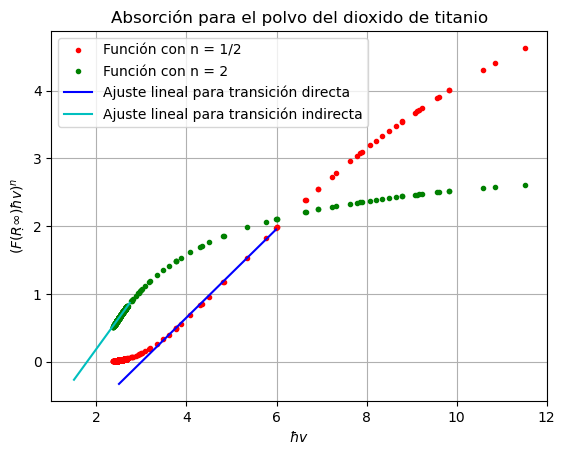

El band gap de transición directa para el polvo de dioxido de titanio es 
3.0053047194863907
El band gap de transición indirecta para el polvo de dioxido de titanio es 
1.7936141592662342


In [19]:
#graficador(R2)
par1,cov1 = funcion_lineal(x_POTitanio,f1_POTitanio,3.25,6)
par2,cov2 = funcion_lineal(x_POTitanio,f2_POTitanio,2.25,3.5)
x11= np.arange(2.5,6.0,0.01)
y11= linea(x11,par1[0],par1[1])
x12= np.arange(1.5,2.75,0.01)
y12= linea(x12,par2[0],par2[1])
nombre = "Absorción para el polvo del dioxido de titanio"
#x21,y21 = funcion_lineal(x_POTitanio,f1_POTitanio,3.25,6)
#x22,y22 = funcion_lineal(x_POTitanio,f2_POTitanio,2.25,3.5)
plt.figure()
plt.title(nombre)
plt.ylabel("$(F(R ̣{\infty}) \hbar  v)^n $")
plt.xlabel("$\hbar v $")
plt.plot(x_POTitanio,f1_POTitanio,'r.',label='Función con n = 1/2')
plt.plot(x_POTitanio,f2_POTitanio,'g.',label='Función con n = 2')
plt.plot(x11,y11,'b',label="Ajuste lineal para transición directa")
plt.plot(x12,y12,'c',label="Ajuste lineal para transición indirecta")
#plt.xlim(3,7)
plt.grid()
plt.legend()
plt.show()
print("El band gap de transición directa para el polvo de dioxido de titanio es ")
print(abs(par1[1]))
print("El band gap de transición indirecta para el polvo de dioxido de titanio es ")
print(abs(par2[1]))

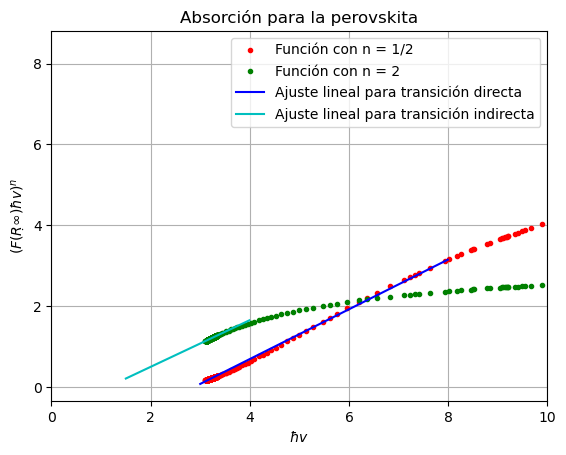

El band gap de transición directa para la perovskita es 
2.8735213280841236
El band gap de transición indirecta para la perovskita es 
1.1342468257372775


In [22]:
par1,cov1 = funcion_lineal(x_perovskita,f1_perovskita,3,8)
par2,cov2 = funcion_lineal(x_perovskita,f2_perovskita,3,4)
x11= np.arange(3,8.0,0.01)
y11= linea(x11,par1[0],par1[1])
x12= np.arange(1.5,4,0.01)
y12= linea(x12,par2[0],par2[1])
nombre = "Absorción para la perovskita"
plt.figure()
plt.title(nombre)
plt.ylabel("$(F(R ̣{\infty}) \hbar  v)^n $")
plt.xlabel("$\hbar v $")
plt.xlim(0,10)
plt.plot(x_perovskita,f1_perovskita,'r.',label='Función con n = 1/2')
plt.plot(x_perovskita,f2_perovskita,'g.',label='Función con n = 2')
plt.plot(x11,y11,'b',label="Ajuste lineal para transición directa")
plt.plot(x12,y12,'c',label="Ajuste lineal para transición indirecta")
#plt.xlim(3,7)
plt.grid()
plt.legend()
plt.show()
print("El band gap de transición directa para la perovskita es ")
print(abs(par1[1]))
print("El band gap de transición indirecta para la perovskita es ")
print(abs(par2[1]))

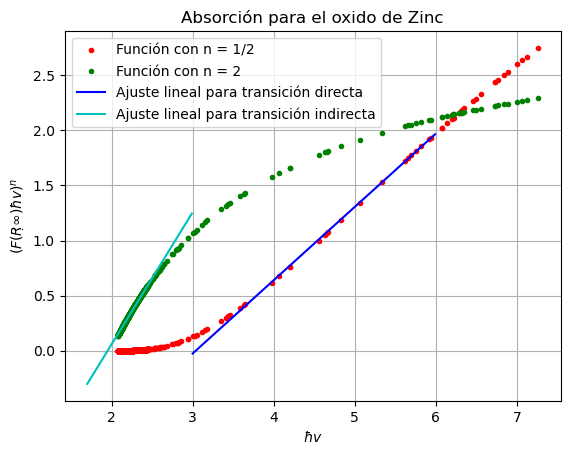

El band gap de transición directa para el oxido de zinc es 
3.037613282318346
El band gap de transición indirecta para el oxido de zinc es 
1.951194783634307


In [23]:
par1,cov1 = funcion_lineal(x_ozinc,f1_ozinc,3.5,6)
par2,cov2 = funcion_lineal(x_ozinc,f2_ozinc,2,3)
x11= np.arange(3,6,0.01)
y11= linea(x11,par1[0],par1[1])
x12= np.arange(1.7,3,0.01)
y12= linea(x12,par2[0],par2[1])
nombre="Absorción para el oxido de Zinc"
plt.figure()
plt.title(nombre)
plt.ylabel("$(F(R ̣{\infty}) \hbar  v)^n $")
plt.xlabel("$\hbar v $")
plt.plot(x_ozinc,f1_ozinc,'r.',label='Función con n = 1/2')
plt.plot(x_ozinc,f2_ozinc,'g.',label='Función con n = 2')
plt.plot(x11,y11,'b',label="Ajuste lineal para transición directa")
plt.plot(x12,y12,'c',label="Ajuste lineal para transición indirecta")
#plt.xlim(3,7)
plt.grid()
plt.legend()
plt.show()
print("El band gap de transición directa para el oxido de zinc es ")
print(abs(par1[1]))
print("El band gap de transición indirecta para el oxido de zinc es ")
print(abs(par2[1]))